Some hands-on exercises using Python to do some descriptive statistics.

These exercises are provided by [Coursera course Statistics for Data Science with Python](https://www.coursera.org/learn/statistics-for-data-science-python/)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)

In [3]:
ratings_df.head(3)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1


## Data Description

| Variable    | Description                                                                                                                                          |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| minority    | Does the instructor belong to a minority (non-Caucasian) group?                                                                                      |
| age         | The professor's age                                                                                                                                  |
| gender      | Indicating whether the instructor was male or female.                                                                                                |
| credits     | Is the course a single-credit elective?                                                                                                              |
| beauty      | Rating of the instructor's physical appearance by a panel of six students averaged across the six panelists and standardized to have a mean of zero. |
| eval        | Course overall teaching evaluation score, on a scale of 1 (very unsatisfactory) to 5 (excellent).                                                    |
| division    | Is the course an upper or lower division course?                                                                                                     |
| native      | Is the instructor a native English speaker?                                                                                                          |
| tenure      | Is the instructor on a tenure track?                                                                                                                 |
| students    | Number of students that participated in the evaluation.                                                                                              |
| allstudents | Number of students enrolled in the course.                                                                                                           |
| prof        | Indicating instructor identifier.                                                                                                                    |


In [4]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

There are 463 entries.

In [5]:
ratings_df.shape

(463, 19)

## Exercises

### 1 Can you identify whether the teachers' Rating data is a time series or cross-sectional?

1. The dataset is a Cross-sectional data type, not a time series data type.
2. There are more than one teacher being observed.

In [6]:
ratings_df.head(10)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
5,no,59,male,more,-0.737732,4.0,upper,yes,yes,35,40,2,0,0,0,0,1,1,1
6,no,59,male,more,-0.737732,2.1,upper,yes,yes,39,44,2,1,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
8,no,51,male,more,-0.571984,3.2,upper,yes,yes,111,195,3,1,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1


### 2 Find the mean, median, minimum, and maximum values for students
找出学生的数据，并计算均值、中值、最小值、最大值

In [7]:
ratings_df["students"].mean()

36.62419006479482

参评的学生人数的均值为 36.62，人数取整数：37

In [8]:
ratings_df["students"].median()

23.0

参评的学生人数的中位数或中值为23.0.

每一位被评价的老师，评价这位老师的学生人数在23人以下的占总评价老师的50%。大于23的，也是。

In [9]:
ratings_df["students"].min()

5

In [10]:
ratings_df["students"].max()

380

参评的老师中，有一位老师只有5位学生评价了，有一位有380位学生评价了。一个最少学生评价，一个最多学生评价。

In [11]:
# 数据总览
ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


```count 是总计.
mean 是均值
std 是标准差 其平方就是方差 variance
25% 1/4位数
50% 中位数
75% 3/4位数
min 最小值
max 最大值```

### 3 Create a histogram of the beauty variable and briefly comment on the distribution of data

针对 容貌 beauty 这个变量，绘制直方图

(array([16., 51., 94., 66., 94., 42., 29., 40., 11., 20.]),
 array([-1.45049405, -1.10844234, -0.76639063, -0.42433892, -0.08228722,
         0.25976449,  0.6018162 ,  0.94386791,  1.28591962,  1.62797133,
         1.97002304]),
 <BarContainer object of 10 artists>)

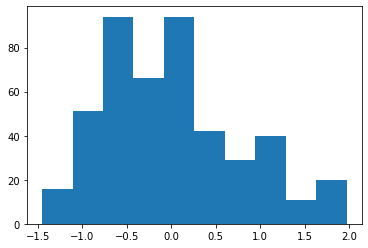

In [12]:
plt.hist(ratings_df["beauty"])

[-0.5, 0.5] 区间的数目较多，另外总体分布偏向右侧坐标轴。

In [13]:
ratings_df["beauty"].mean()

6.271139971233405e-08

In [14]:
ratings_df["beauty"].median()

-0.0680143013596535

In [15]:
ratings_df["beauty"].std()

0.7886476677562292

### 4 Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.

容貌评分的均值因性别而有差异吗？

Use a group by gender to view the mean scores of the beauty we can say that beauty scores differ by gender as the mean beauty score for women is higher than men

这就需要我们去计算女性容貌评分均值mean和男性的mean。
如果女性的容貌评分均值高于男性，那么我们就判断：容貌均值会有性别差异。

这里已经提示使用 groupby。

In [16]:
ratings_df.groupby("gender").agg({"beauty": ["mean", "std", "var"]}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

female 女性容貌均值高于男性

### 5 Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

计算tenure终身教职中，男女比例

In [17]:
mask = ratings_df.tenure == "yes"
tenure_sex = ratings_df[mask].groupby("gender")['tenure'].count().reset_index()

In [18]:
tenure_sex.head()

,gender,tenure
0,female,145
1,male,216


In [19]:
tenure_sex2 = ratings_df[ratings_df["tenure"] == "yes"].groupby("gender").agg({"tenure": "count"}).reset_index()

In [20]:
tenure_sex2.head()

,gender,tenure
0,female,145
1,male,216


The percentage

In [21]:
tenure_sex["percentage"] = 100 * tenure_sex.tenure / tenure_sex.tenure.sum()

tenure_sex

,gender,tenure,percentage
0,female,145,40.166205
1,male,216,59.833795


终身教职中，女性占比约 40.17%， 男性 59.83%

## Practice Questions
下面是给出的练习题

### Q1：Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?

计算少数族裔老师是终身教职的比例。根据数据判断终身教职会因为老师是少数族裔会产生不同吗？会不会因为教师是少数族裔的，更容易得到终身教职？课程给出的答案，我认为有点偏差。

In [22]:
# 先来看看 终身教职中，少数族裔和非少数族裔的比例
mask = ratings_df.tenure == "yes"
tenure_minority = ratings_df[mask].groupby("minority").agg({"tenure": "count"}).reset_index()

tenure_minority

,minority,tenure
0,no,307
1,yes,54


In [23]:
tenure_minority["percentage"] = 100 * tenure_minority.tenure / tenure_minority.tenure.sum()

In [24]:
tenure_minority

,minority,tenure,percentage
0,no,307,85.041551
1,yes,54,14.958449


终身教职中，少数族裔的比例占比约为14.96%，小于非少数族裔的。我们可能会认为存在偏见，没有平等。但我认为还是要看少数族裔中，tenure的比例是否和 非少数族裔中 tenure的比例相近。

In [25]:
ratings_df.shape

(463, 19)

In [26]:
tenure_minor = ratings_df.groupby(["minority", "tenure"]).size().reset_index(name="count")

tenure_minor

,minority,tenure,count
0,no,no,92
1,no,yes,307
2,yes,no,10
3,yes,yes,54


In [28]:
tenure_minor["count"].sum()

463

In [29]:
# 不同族裔中，tenure 和 not tenure 的比例，
tenure_minor["percentage"] = 100 * tenure_minor["count"] / tenure_minor["count"].sum()

tenure_minor

,minority,tenure,count,percentage
0,no,no,92,19.870410
1,no,yes,307,66.306695
2,yes,no,10,2.159827
3,yes,yes,54,11.663067


少数族裔中，tenure的比例和非少数族裔中tenure比例对比

In [32]:
diff = (tenure_minor['count'][1] / (tenure_minor['count'][:2].sum()) - \
tenure_minor['count'][3] / (tenure_minor['count'][2:].sum())) * 100

diff

-7.432644110275688

上面的-7.4% 表示：非少数族裔中，教师获得终身教职的比例比少数族裔中获得终身教职的教师比例少7.4%。

下面是课程给出的solution, which I think is not perfect.

Double-click **here** for the solution.

<!-- The answer is below:
### we can use a groupby function for this
## first groupby to get the total sum
tenure_count = ratings_df.groupby('minority').agg({'tenure': 'count'}).reset_index()
# Find the percentage
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()
##print to see
tenure_count
-->

In [33]:
tenure_count = ratings_df.groupby('minority').agg({'tenure': 'count'}).reset_index()

tenure_count

,minority,tenure
0,no,399
1,yes,64


In [34]:
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()
tenure_count

,minority,tenure,percentage
0,no,399,86.177106
1,yes,64,13.822894


You can see the number of the sample is 463,(the total is also 463). This solution just count the percentage of the minority of the sample.

### Q2 Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.

平均年龄(均值）会因tenure 不同而不同吗？计算教师是终身教授和非终身教授的年龄平均值和标准差。

In [36]:
ratings_df.groupby("tenure").agg({"age": ["mean", "std", "var", "median"]}).reset_index()

tenure        age                              
               mean        std         var median
0     no  50.186275   6.946372   48.252087     50
1    yes  47.850416  10.420056  108.577562     47

终身教授的年龄均值为47.85，而非终身教授的为50.19.相差 2.34 年。

### Q3 Create a histogram for the age variable.

(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <BarContainer object of 10 artists>)

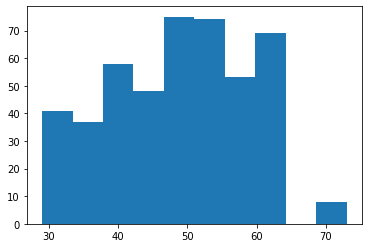

In [37]:
plt.hist(ratings_df["age"])

年龄极中在50-60岁，其中还有70岁以上的，不过人数较少。

### Q4: What is the Median evaluation score for tenured Professors?

终身教授的学生评分中位数计算

In [39]:
mask = ratings_df.tenure == "yes"
tenure_eval = ratings_df[mask]["eval"]
tenure_eval.median()

4.0

## Claim

These exercises are provided by [Coursera course Statistics for Data Science with Python](https://www.coursera.org/learn/statistics-for-data-science-python/)

## Change Log

2022-04-14 Jeremy created and practiced.